In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
m1_rbm = np.load("recon_sh48-to-m1-rbm.pkl",allow_pickle=True)
print(m1_rbm.keys())
print(m1_rbm['calib'][0].keys())
m1_rbm['calib'][0]['n_mode']

dict_keys(['calib', 'pinv', 'data', 'estimate', 'mode'])
dict_keys(['sid', 'n_mode', 'c', 'mask', 'mode', 'runtime', 'n_cols'])


6

In [4]:
m2_rbm = np.load("recon_sh48-to-m2-rbm.pkl",allow_pickle=True)
print(m2_rbm.keys())
print(m2_rbm['calib'][0].keys())
m2_rbm['calib'][0]['n_mode']

dict_keys(['calib', 'pinv', 'data', 'estimate', 'mode'])
dict_keys(['sid', 'n_mode', 'c', 'mask', 'mode', 'runtime', 'n_cols'])


6

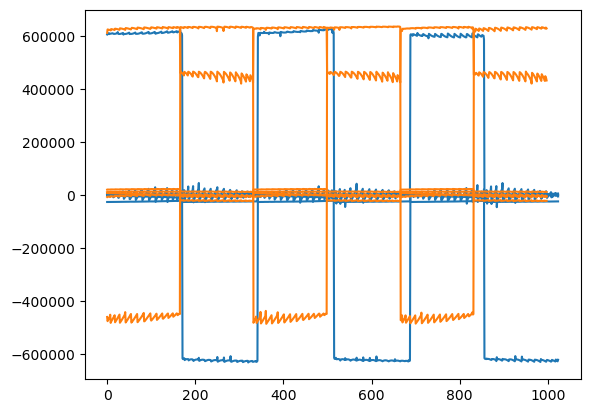

In [5]:
m1_rbm_c = np.asarray(m1_rbm['calib'][0]['c']).reshape(6,-1).T
plt.plot(m1_rbm_c,'C0');
m1_rbm_c = np.asarray(m1_rbm['calib'][2]['c']).reshape(6,-1).T
plt.plot(m1_rbm_c,'C1');

# Valid lenslets

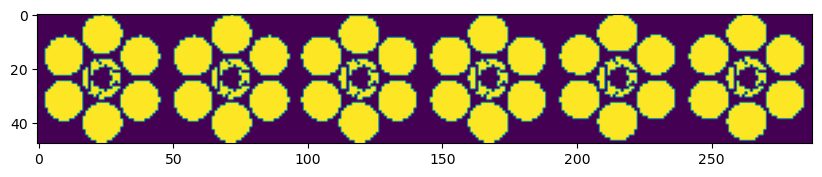

In [10]:
q = np.hstack(np.vsplit(np.dstack([np.asarray(x['mask']).reshape(-1,48) for x in m1_rbm['calib']]).sum(2),6))
fig,ax = plt.subplots(figsize=(10,5))
ax.imshow(q)

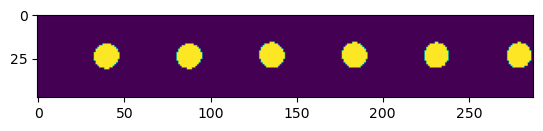

In [22]:
np.asarray(m1_rbm['calib'][0]['mask']).shape,48*48*3*2
q = np.asarray(m1_rbm['calib'][0]['mask'])
plt.imshow(q.reshape(-1,48).T)

# M1 S1 RBM poke matrix

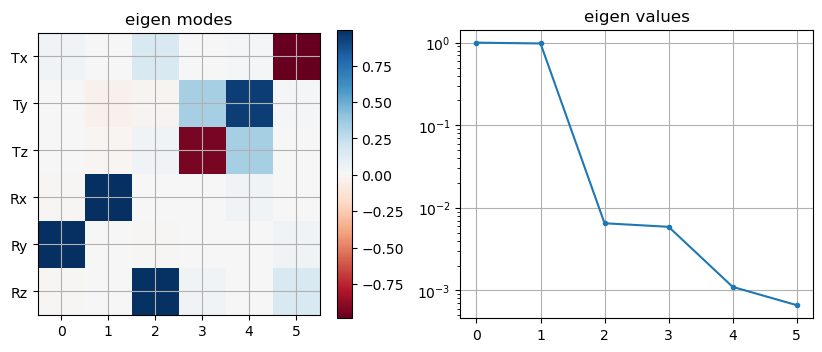

In [12]:
m1_rbm_c = np.asarray(m1_rbm['calib'][0]['c']).reshape(6,-1).T
u,s,vt = np.linalg.svd(m1_rbm_c,full_matrices=False)

fig,(ax0,ax1) = plt.subplots(ncols=2,figsize=(10,3.75))
h = ax0.imshow(vt.T,cmap="RdBu")
ax0.set_yticks(range(6))
ax0.set_yticklabels(["Tx","Ty","Tz","Rx","Ry","Rz"])
ax0.grid()
ax0.set_title("eigen modes")
fig.colorbar(h,ax=ax0)
ax1.semilogy(s/s[0],'.-')
ax1.grid()
ax1.set_title("eigen values");


# M2 S1 RBM poke matrix

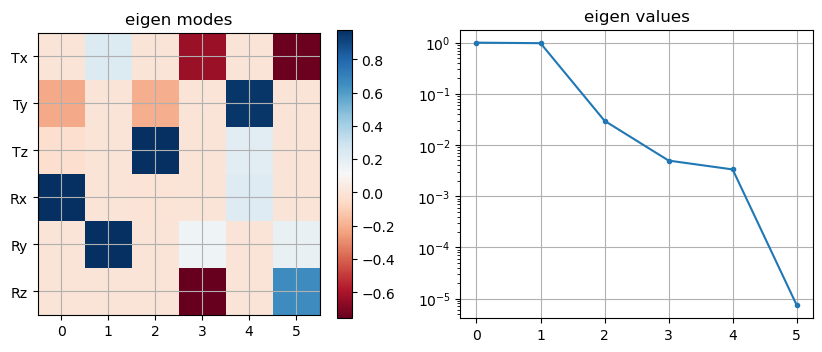

In [13]:
m2_rbm_c = np.asarray(m2_rbm['calib'][0]['c']).reshape(6,-1).T
u,s,vt = np.linalg.svd(m2_rbm_c,full_matrices=False)

fig,(ax0,ax1) = plt.subplots(ncols=2,figsize=(10,3.75))
h = ax0.imshow(vt.T,cmap="RdBu")
ax0.set_yticks(range(6))
ax0.set_yticklabels(["Tx","Ty","Tz","Rx","Ry","Rz"])
ax0.grid()
ax0.set_title("eigen modes")
fig.colorbar(h,ax=ax0)
ax1.semilogy(s/s[0],'.-')
ax1.grid()
ax1.set_title("eigen values");

# M1 S1 & M2 S1 RBM poke matrix

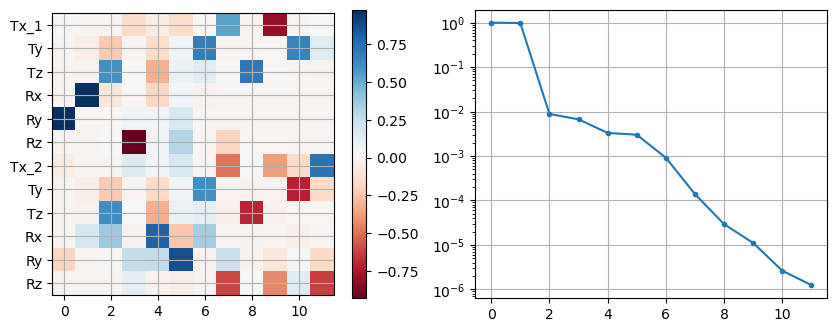

In [24]:
m12_rbm_c = np.hstack([m1_rbm_c,m2_rbm_c])
u,s,vt = np.linalg.svd(m12_rbm_c,full_matrices=False)

fig,(ax0,ax1) = plt.subplots(ncols=2,figsize=(10,3.75))
h = ax0.imshow(vt.T,cmap="RdBu")
ax0.set_yticks(range(12))
ax0.set_yticklabels(["Tx_1","Ty","Tz","Rx","Ry","Rz","Tx_2","Ty","Tz","Rx","Ry","Rz"])
ax0.grid()
fig.colorbar(h,ax=ax0)
ax1.semilogy(s/s[0],'.-')
ax1.grid()

In [29]:
m12_rbm_c.shape,O

((1024, 12),
 array([[1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0.]]))

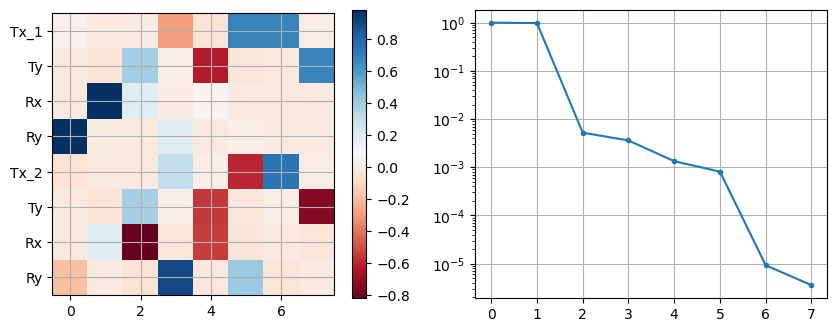

In [ ]:
O = np.zeros((12,8))
O[0,0] = 1
O[1,1] = 1
O[3,2] = 1
O[4,3] = 1
O[6,4] = 1
O[7,5] = 1
O[9,6] = 1
O[10,7] = 1

u,s,vt = np.linalg.svd(m12_rbm_c@O,full_matrices=False)

fig,(ax0,ax1) = plt.subplots(ncols=2,figsize=(10,3.75))
h = ax0.imshow(vt.T,cmap="RdBu")
ax0.set_yticks(range(8))
ax0.set_yticklabels(["Tx_1","Ty","Rx","Ry","Tx_2","Ty","Rx","Ry"])
ax0.grid()
fig.colorbar(h,ax=ax0)
ax1.semilogy(s/s[0],'.-')
ax1.grid()

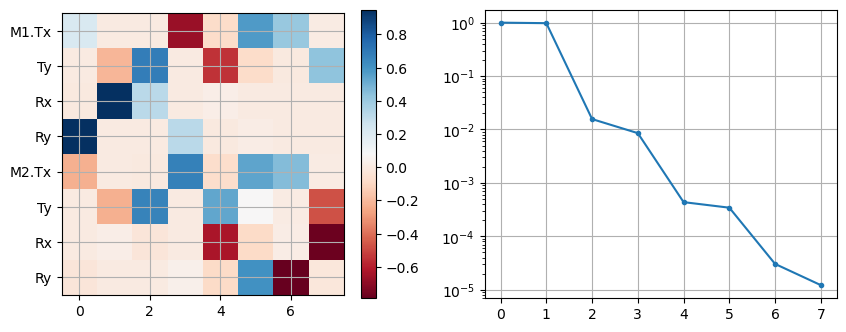

In [34]:
O = np.zeros((12,8))
O[0,0] = 11
O[1,1] = 11
O[3,2] = 2
O[4,3] = 2
O[6,4] = 11
O[7,5] = 11
O[9,6] = 0.25
O[10,7] = 0.25

u,s,vt = np.linalg.svd(m12_rbm_c@O,full_matrices=False)

fig,(ax0,ax1) = plt.subplots(ncols=2,figsize=(10,3.75))
h = ax0.imshow(vt.T,cmap="RdBu")
ax0.set_yticks(range(8))
ax0.set_yticklabels(["M1.Tx","Ty","Rx","Ry","M2.Tx","Ty","Rx","Ry"])
ax0.grid()
fig.colorbar(h,ax=ax0)
ax1.semilogy(s/s[0],'.-')
ax1.grid()